Question No 2 Solution

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi
import math

part (a)
"A" matrix generation:-
i used vectorized implementation to produce matrix A (without the for loops).
Numpy operations are way more faster than for loops

In [30]:

def A_matrix_producer(M, B, S):
	
	t = np.linspace(0, M, M).reshape((M, 1))
	print(t.shape)
	k= (np.linspace(-B*S, B*S, 2*B*S+1).reshape((2*B*S+1,1)).T)/S
	print(k.shape)
	#vectorized implementation to generate matrix A
	A = np.exp(np.dot(t, k)*2*pi*1j)
	print("A matrix shape: ",A.shape)
	return A


part(b) generating the function g(t) = cos(2π^2t)

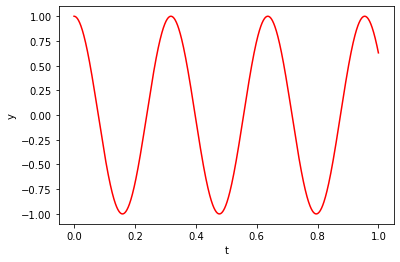

In [31]:
M=1024
t = np.linspace(0,1,M)
Y = np.cos(2*(pi**2)*t).reshape(M,1)
plt.plot(t,Y,'r')
plt.xlabel('t')
plt.ylabel('y')
plt.show()

(1024, 1)
(1, 97)
A matrix shape:  (1024, 97)
[[ 1.        +0.00000000e+00j  1.        +0.00000000e+00j
   1.        +0.00000000e+00j ...  1.        +0.00000000e+00j
   1.        +0.00000000e+00j  1.        +0.00000000e+00j]
 [ 0.99517532-9.81126453e-02j -0.41448365+9.10056760e-01j
  -0.57922276-8.15169302e-01j ... -0.57922276+8.15169302e-01j
  -0.41448365-9.10056760e-01j  0.99517532+9.81126453e-02j]
 [ 0.98074782-1.95278565e-01j -0.65640661-7.54407290e-01j
  -0.32900198+9.44329230e-01j ... -0.32900198-9.44329230e-01j
  -0.65640661+7.54407290e-01j  0.98074782+1.95278565e-01j]
 ...
 [ 0.98074782+1.95278565e-01j -0.32513257-9.45668446e-01j
  -0.65331211+7.57088691e-01j ... -0.65331211-7.57088691e-01j
  -0.32513257+9.45668446e-01j  0.98074782-1.95278565e-01j]
 [ 0.99517532+9.81126453e-02j  0.9953741 +9.60750117e-02j
   0.99556871+9.40369753e-02j ...  0.99556871-9.40369753e-02j
   0.9953741 -9.60750117e-02j  0.99517532-9.81126453e-02j]
 [ 1.        +4.01292263e-12j -0.5       +8.66025404e-

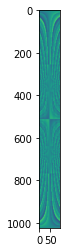

In [40]:

A = A_matrix_producer(M, 16, 3)    #M=1024 defined in cell above
plt.imshow(np.angle(A))
print(A)


Computing SVD of A

)))))))) [[0.03031061 0.         0.         ... 0.         0.         0.        ]
 [0.         0.03033018 0.         ... 0.         0.         0.        ]
 [0.         0.         0.03126418 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.03126658 0.         0.        ]
 [0.         0.         0.         ... 0.         0.03126667 0.        ]
 [0.         0.         0.         ... 0.         0.         0.03177246]]
(97, 97)
Sinvshape (97, 1024)


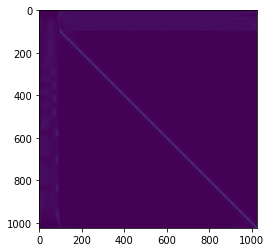

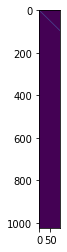

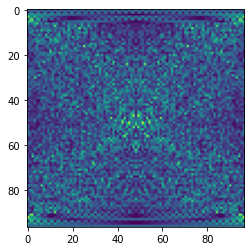

In [45]:
U, S_ecn, Vh = np.linalg.svd(A, full_matrices=True)
#converting 1D S to diagonal 2D sigma matrix
S_ecn = np.diag(1/S_ecn)
print("))))))))",S_ecn)
Z = np.zeros(((U.shape[0]-S_ecn.shape[0]),S_ecn.shape[1]))

S = np.vstack((S_ecn,Z))
#print(S)
#print(U)
plt.imshow(abs(U))
plt.figure()
plt.imshow(abs(S))
plt.figure()
plt.imshow(abs(Vh))
print(Vh.shape)
# numpy SVD function returns the V matrtix as its conjugate transpose (Hermitian) 
#so we need to convert this to V by taking conjugate transpose
V = Vh.T.conj()
A_reconstruct = np.dot(np.dot(U,S),Vh)
#S is not square so we take psudo inverse of S
Sinv = np.dot(np.linalg.inv(np.dot(S.T,S)),S.T)
print("Sinvshape",Sinv.shape)
alpha_hat = np.dot(np.dot(np.dot(V,Sinv),U.T.conj()),Y)  # V S inv Uh

y_pred_clean= np.dot(A_reconstruct, alpha_hat)


c:\Python\Python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


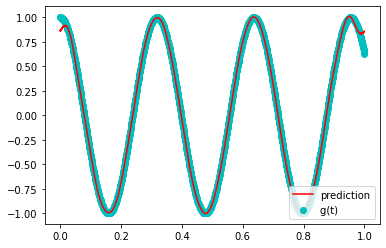

In [46]:
plt.plot(t,y_pred_clean, color = 'r')
plt.scatter(t,Y, color = 'c')
plt.legend(["prediction", "g(t) "], loc ="lower right")
plt.show()

0.9893535835769601


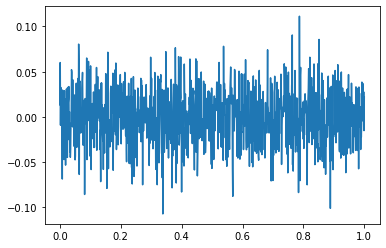

In [7]:
noise = np.random.normal(0,1,M).reshape(M,1)*0.031099
plt.plot(t, noise)
print(np.linalg.norm(noise))

In [15]:
def randomvector(n):
    components = [np.random.normal() for i in range(n)]
    r = math.sqrt(sum(x*x for x in components))
    v = [x/r for x in components]
    return v

noise = np.asfarray(randomvector(M)).reshape(M,1)
print(noise.shape)
print(np.linalg.norm(noise))





(1024, 1)
0.9999999999999997


(1024, 1)
(1024, 1)
(1024, 1)


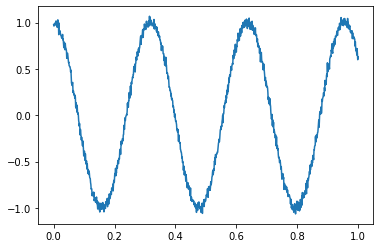

In [16]:
y_noisy = np.sum((Y,  noise),axis=0)
print(noise.shape)
print(Y.shape)
print(y_noisy.shape)
plt.plot(t, y_noisy)

(0.8374122075075203-1.8549603869110092j)


c:\Python\Python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\Python\Python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


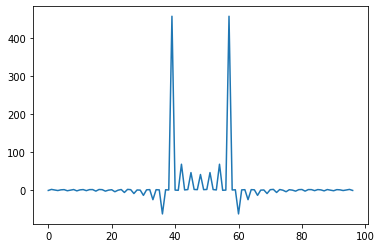

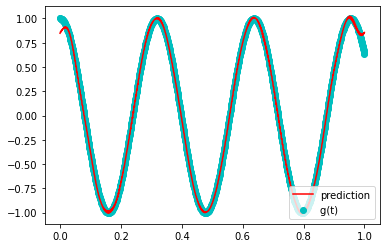

In [17]:

alpha_hat_noisy =  np.dot(np.dot(np.dot(V,Sinv),U.T.conj()),y_noisy)  # V S inv Uh
print(np.amax( np.dot(np.dot(np.dot(V,Sinv),U.T.conj()),noise)))
plt.plot(alpha_hat_noisy)
y_pred2= np.dot(A_reconstruct, alpha_hat_noisy)
plt.figure()
plt.plot(t,y_pred2, color = 'r')
plt.scatter(t,Y, color = 'c')
plt.legend(["prediction", "g(t) "], loc ="lower right")
plt.show()